<a href="https://colab.research.google.com/github/3m6d/ML-techniques-practise/blob/main/DataPreprocessing_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Data Preprocessing Script for Titanic Dataset**

This script demonstrates data preprocessing techniques using the Titanic dataset.
Key steps include handling missing values, detecting and addressing outliers,
encoding categorical variables, and scaling numerical features for machine learning readiness.



In [ ]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd

# Load the Titanic dataset using seaborn's built-in function without download
df = sns.load_dataset('titanic')


In [ ]:
# Display the first few rows to understand the data structure
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Display the last few rows for additional data insight
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
# Summary of dataset's structure, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#stats summary of numerical columns
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

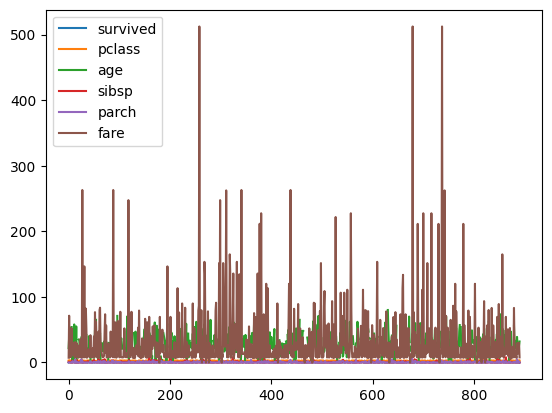

In [ ]:
# supports cross platforms
import matplotlib.pyplot as plt

# Plot the data for initial visualization and understanding
df.plot()


<Axes: >

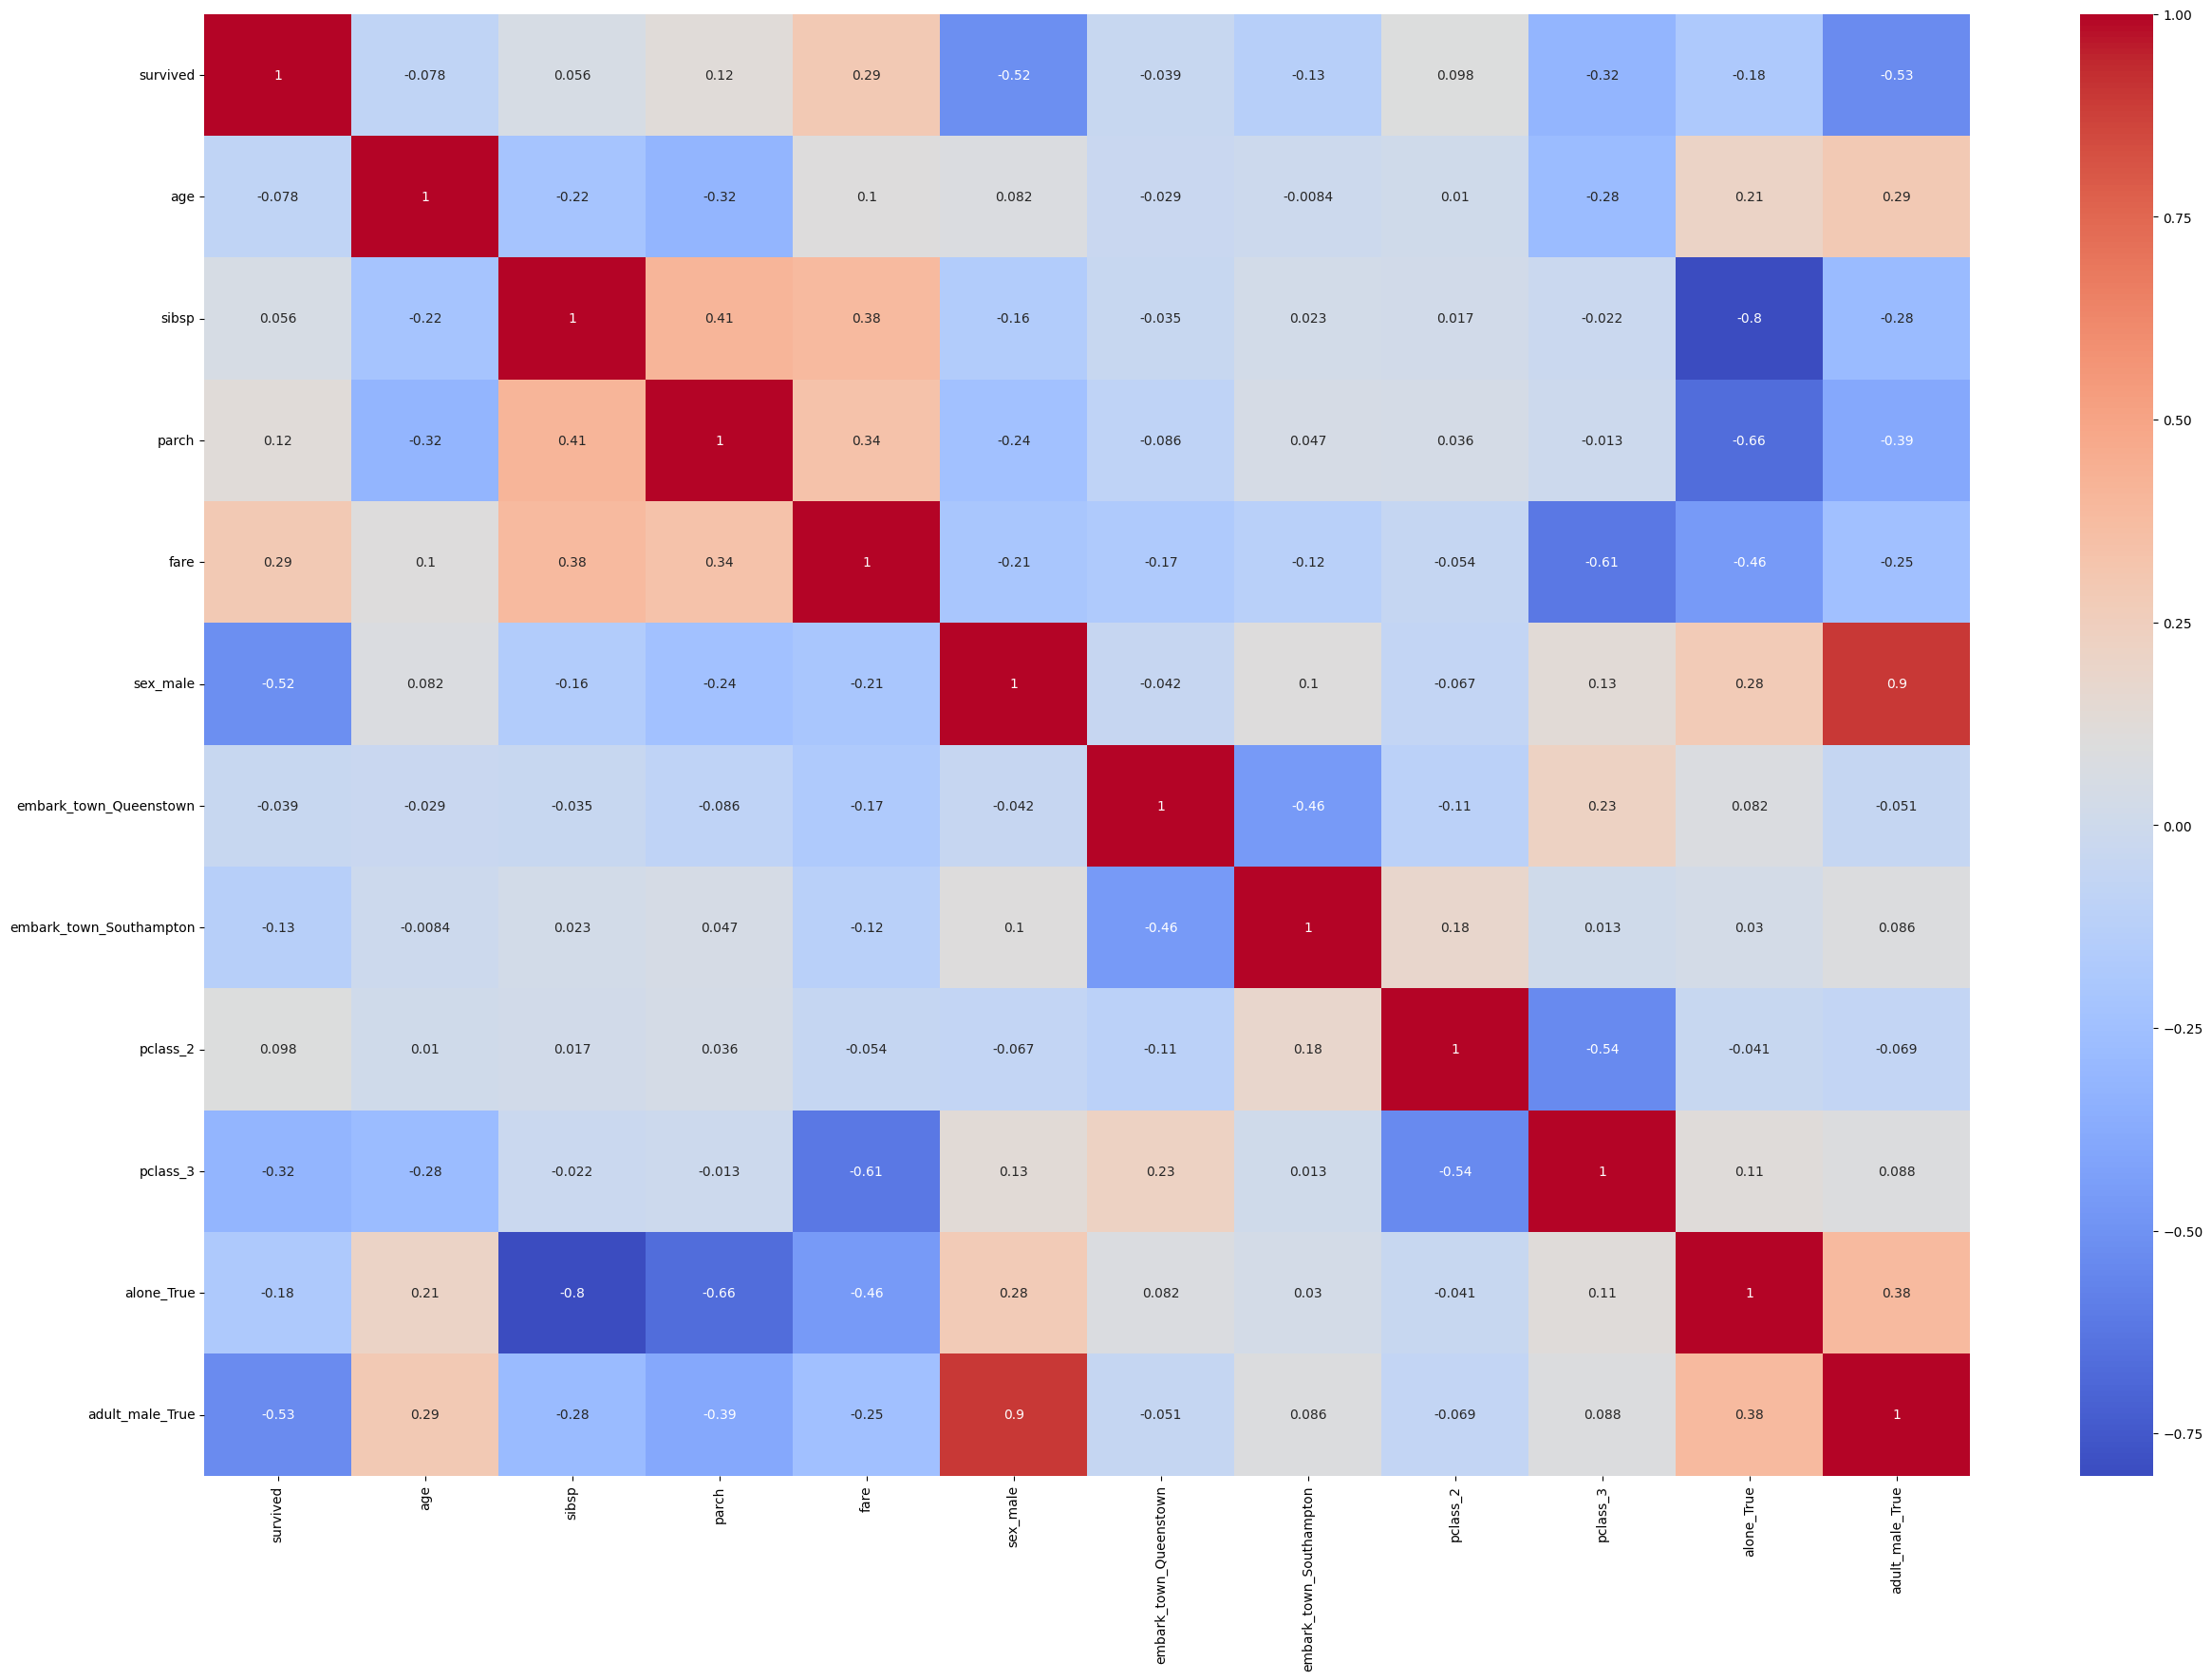

In [200]:
# Visualize correlation matrix to check for multicollinearity

plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Handling Missing Values in Data Preprocessing

Missing values are a common issue in datasets and can occur for various reasons, such as incomplete data entry or data corruption. Addressing missing values is essential for maintaining data quality and ensuring that the dataset is suitable for analysis and modeling.

Why Handle Missing Values?
- Prevent Bias: Missing data can distort analysis, as it may represent specific patterns or groups (e.g., missing ages for certain demographics). Proper handling reduces this bias and makes the dataset more representative.

- Improve Model Performance: Machine learning models cannot handle missing values directly, and leaving them unaddressed can lead to errors or inaccurate predictions.

- Enhance Data Consistency: Handling missing values ensures that every feature is complete and usable, which is critical for models that rely on consistent data input.


In [ ]:
#data preprocessing means finding outliers,
#handling missing values
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#percentange of missing values in the each column

df.isna().sum()/len(df)

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,0.198653
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.002245
class,0.000000
who,0.000000


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:

# Remove columns that may not be useful for modeling or impact multicollinearity
# Dropped columns: 'class', 'who', 'alive', 'deck', 'embarked'

# concept: assumptions of linear regresssion that impacts multi colinearity
df = df.drop(columns=['class', 'who','alive', 'deck', 'embarked'])


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


###Treatment of missing values by imputing with Mean, Median, or Mode:

For numerical data, missing values are often replaced with the mean or median of that column. The median is used when there are outliers, as it is less affected by extreme values, while the mean can be used for normally distributed data.
For categorical data, missing values are typically filled with the mode (most frequent value), as it represents the most common category.

Numerical missing values (e.g., age) are filled with the median value, which preserves data consistency without being skewed by outliers.

In [ ]:
#median = nondecimal central value vs mean = average and can be decimal

# so we use median to replace the fill the missing values

# Filling missing values in 'age' with the median to minimize data skew
df['age'] = df['age'].fillna(df['age'].median())

#inplace means save the value

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [ ]:
# Confirm that all missing values have been addressed
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
adult_male,0
embark_town,2
alone,0


Categorical missing values (e.g., embark_town) are filled with the mode to represent the most common category.

In [ ]:
#embark_town is categorical value so we use mode with highest value
# Filling missing values in 'embark_town' with the mode, as it is categorical
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


In [ ]:
# Confirm that all missing values have been addressed
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
adult_male,0
embark_town,0
alone,0


In [ ]:
df.isna().sum()/len(df)


,0
survived,0.0
pclass,0.0
sex,0.0
age,0.0
sibsp,0.0
parch,0.0
fare,0.0
adult_male,0.0
embark_town,0.0
alone,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


## Handling Duplicate Values in Data Preprocessing
Duplicate values in a dataset can negatively impact data analysis and model performance, so it’s essential to identify and handle them during preprocessing.

Why Remove Duplicates?
Avoid Redundancy: Duplicate rows can artificially inflate certain patterns or relationships, leading to bias in data analysis and model training.
Improve Model Performance: Redundant data can cause the model to "overfit," where it learns to recognize repeated patterns rather than genuine relationships, reducing its ability to generalize to new data.
Ensure Data Integrity: Duplicate entries might result from data collection or merging issues. Removing them improves data quality and consistency, which is crucial for accurate insights.



In [ ]:
# Drop duplicate entries if any exist in the dataset

df = df.drop_duplicates()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     775 non-null    int64  
 1   pclass       775 non-null    int64  
 2   sex          775 non-null    object 
 3   age          775 non-null    float64
 4   sibsp        775 non-null    int64  
 5   parch        775 non-null    int64  
 6   fare         775 non-null    float64
 7   adult_male   775 non-null    bool   
 8   embark_town  775 non-null    object 
 9   alone        775 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 56.0+ KB


# Outlier Treatment Using IQR

Outliers are data points that significantly differ from other observations and can skew results. The IQR method helps detect outliers by analyzing the spread of the middle 50% of the data.

- **Step 1:** Calculate the first (Q1) and third quartile (Q3) of the data.
- **Step 2:** Compute the IQR as the difference between Q3 and Q1:  
  \(\text{IQR} = Q3 - Q1 \)
- **Step 3:** Identify the lower and upper bounds for potential outliers:  
  - Lower Bound = \( Q1 - 1.5 \times \text{IQR} \)  
  - Upper Bound = \( Q3 + 1.5 \times \text{IQR} \)
- **Step 4:** Any data points outside this range (either lower or higher) are considered outliers.

**Why It's Done:**  
- Outliers can affect the performance of statistical models by distorting the mean, variance, and assumptions of normality.
- Treating outliers ensures more reliable and robust model predictions.


In [ ]:
#cleaning data means outliers detection that skews my data

In [ ]:
numerical_columns = df.select_dtypes(include = ['number'])

In [ ]:
numerical_columns.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


<Axes: >

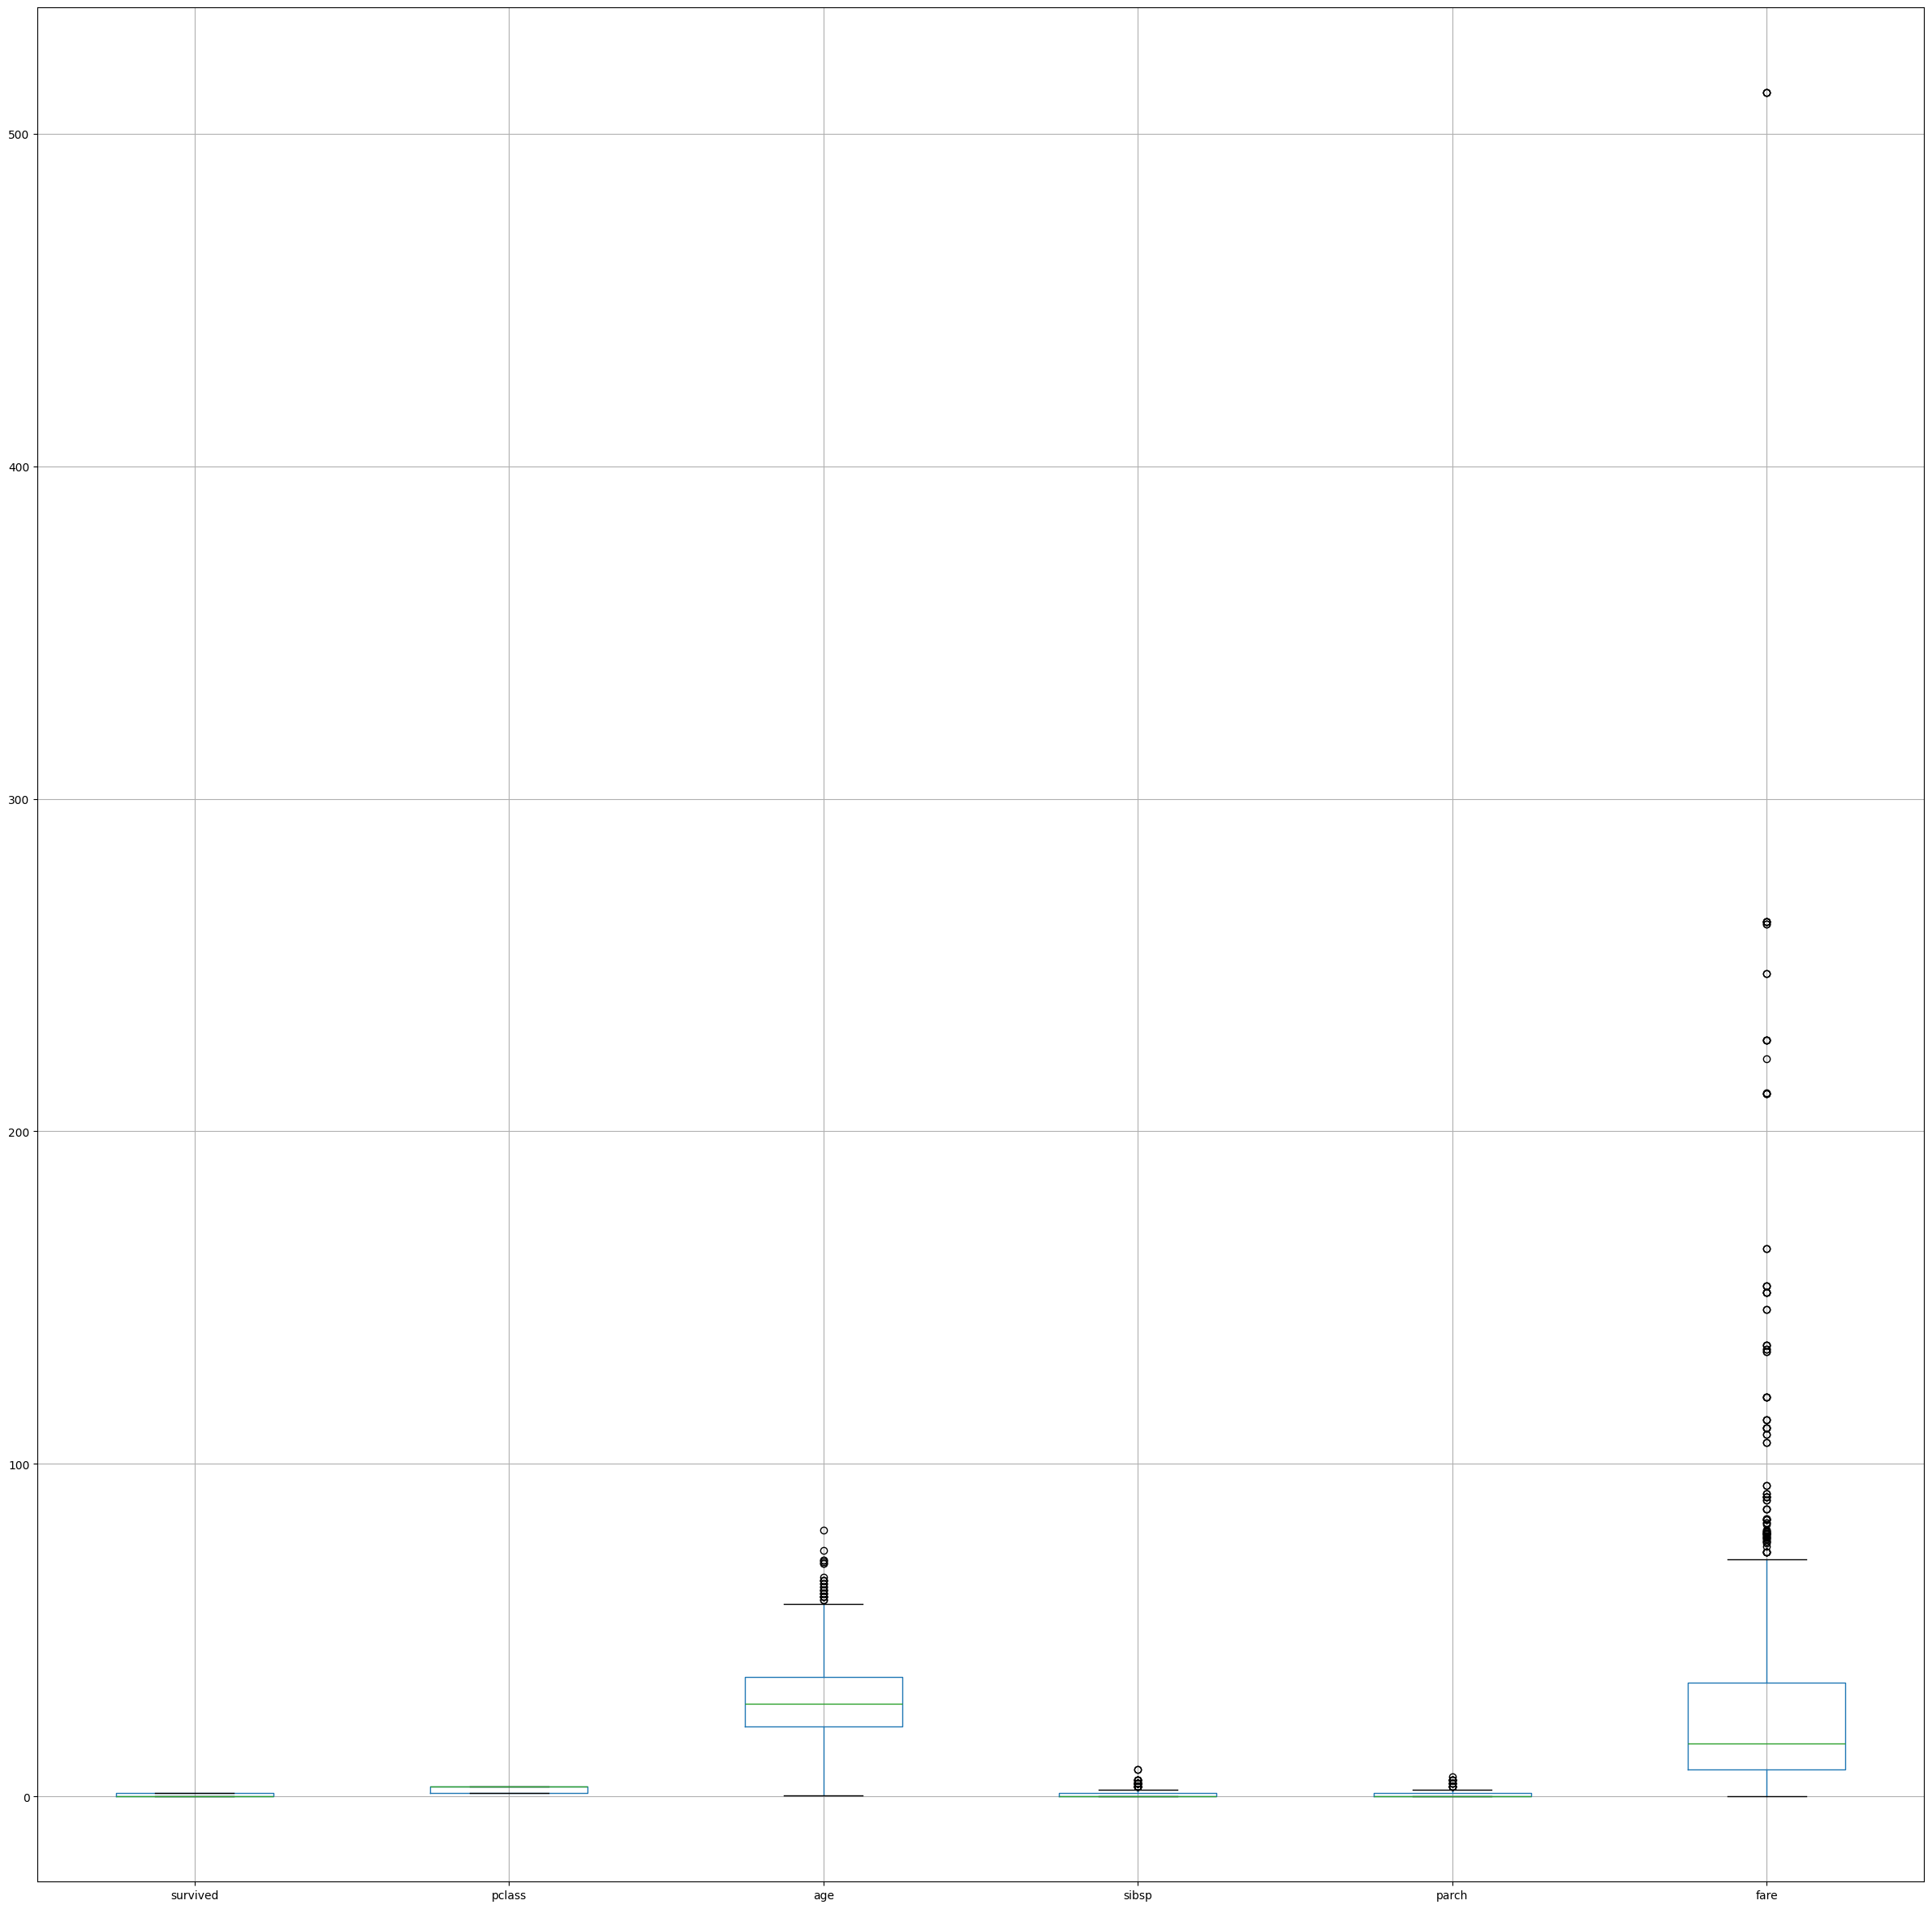

In [ ]:
# Detecting outliers in numerical data using box plots

numerical_columns.boxplot(figsize = (30,30))

In [ ]:
# Calculate the Interquartile Range (IQR) for outlier detection
Q1 = numerical_columns.quantile(0.25)
print("Q1 :", Q1)
Q3 = numerical_columns.quantile(0.75)
print("Q3 : ",Q3)
IQR = Q3-Q1
print ("The interquartile range is" ,IQR)


Q1 : survived     0.00
pclass       1.00
age         21.00
sibsp        0.00
parch        0.00
fare         8.05
Name: 0.25, dtype: float64
Q3 :  survived     1.0000
pclass       3.0000
age         36.0000
sibsp        1.0000
parch        1.0000
fare        34.1979
Name: 0.75, dtype: float64
The interquartile range is survived     1.0000
pclass       2.0000
age         15.0000
sibsp        1.0000
parch        1.0000
fare        26.1479
dtype: float64


In [ ]:
# Define lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR

print ("upper bound : ", lower_bound)

upper_bound = Q1 + 1.5 * IQR

print ("upper bound : ", upper_bound)

upper bound :  survived    -1.50000
pclass      -2.00000
age         -1.50000
sibsp       -1.50000
parch       -1.50000
fare       -31.17185
dtype: float64


In [ ]:

# Clipping outliers to the lower and upper bounds

df[numerical_columns.columns] = numerical_columns.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [ ]:
# Re-check box plots to verify outlier treatment

numerical_columns = df.select_dtypes(include = ['number'])


<Axes: >

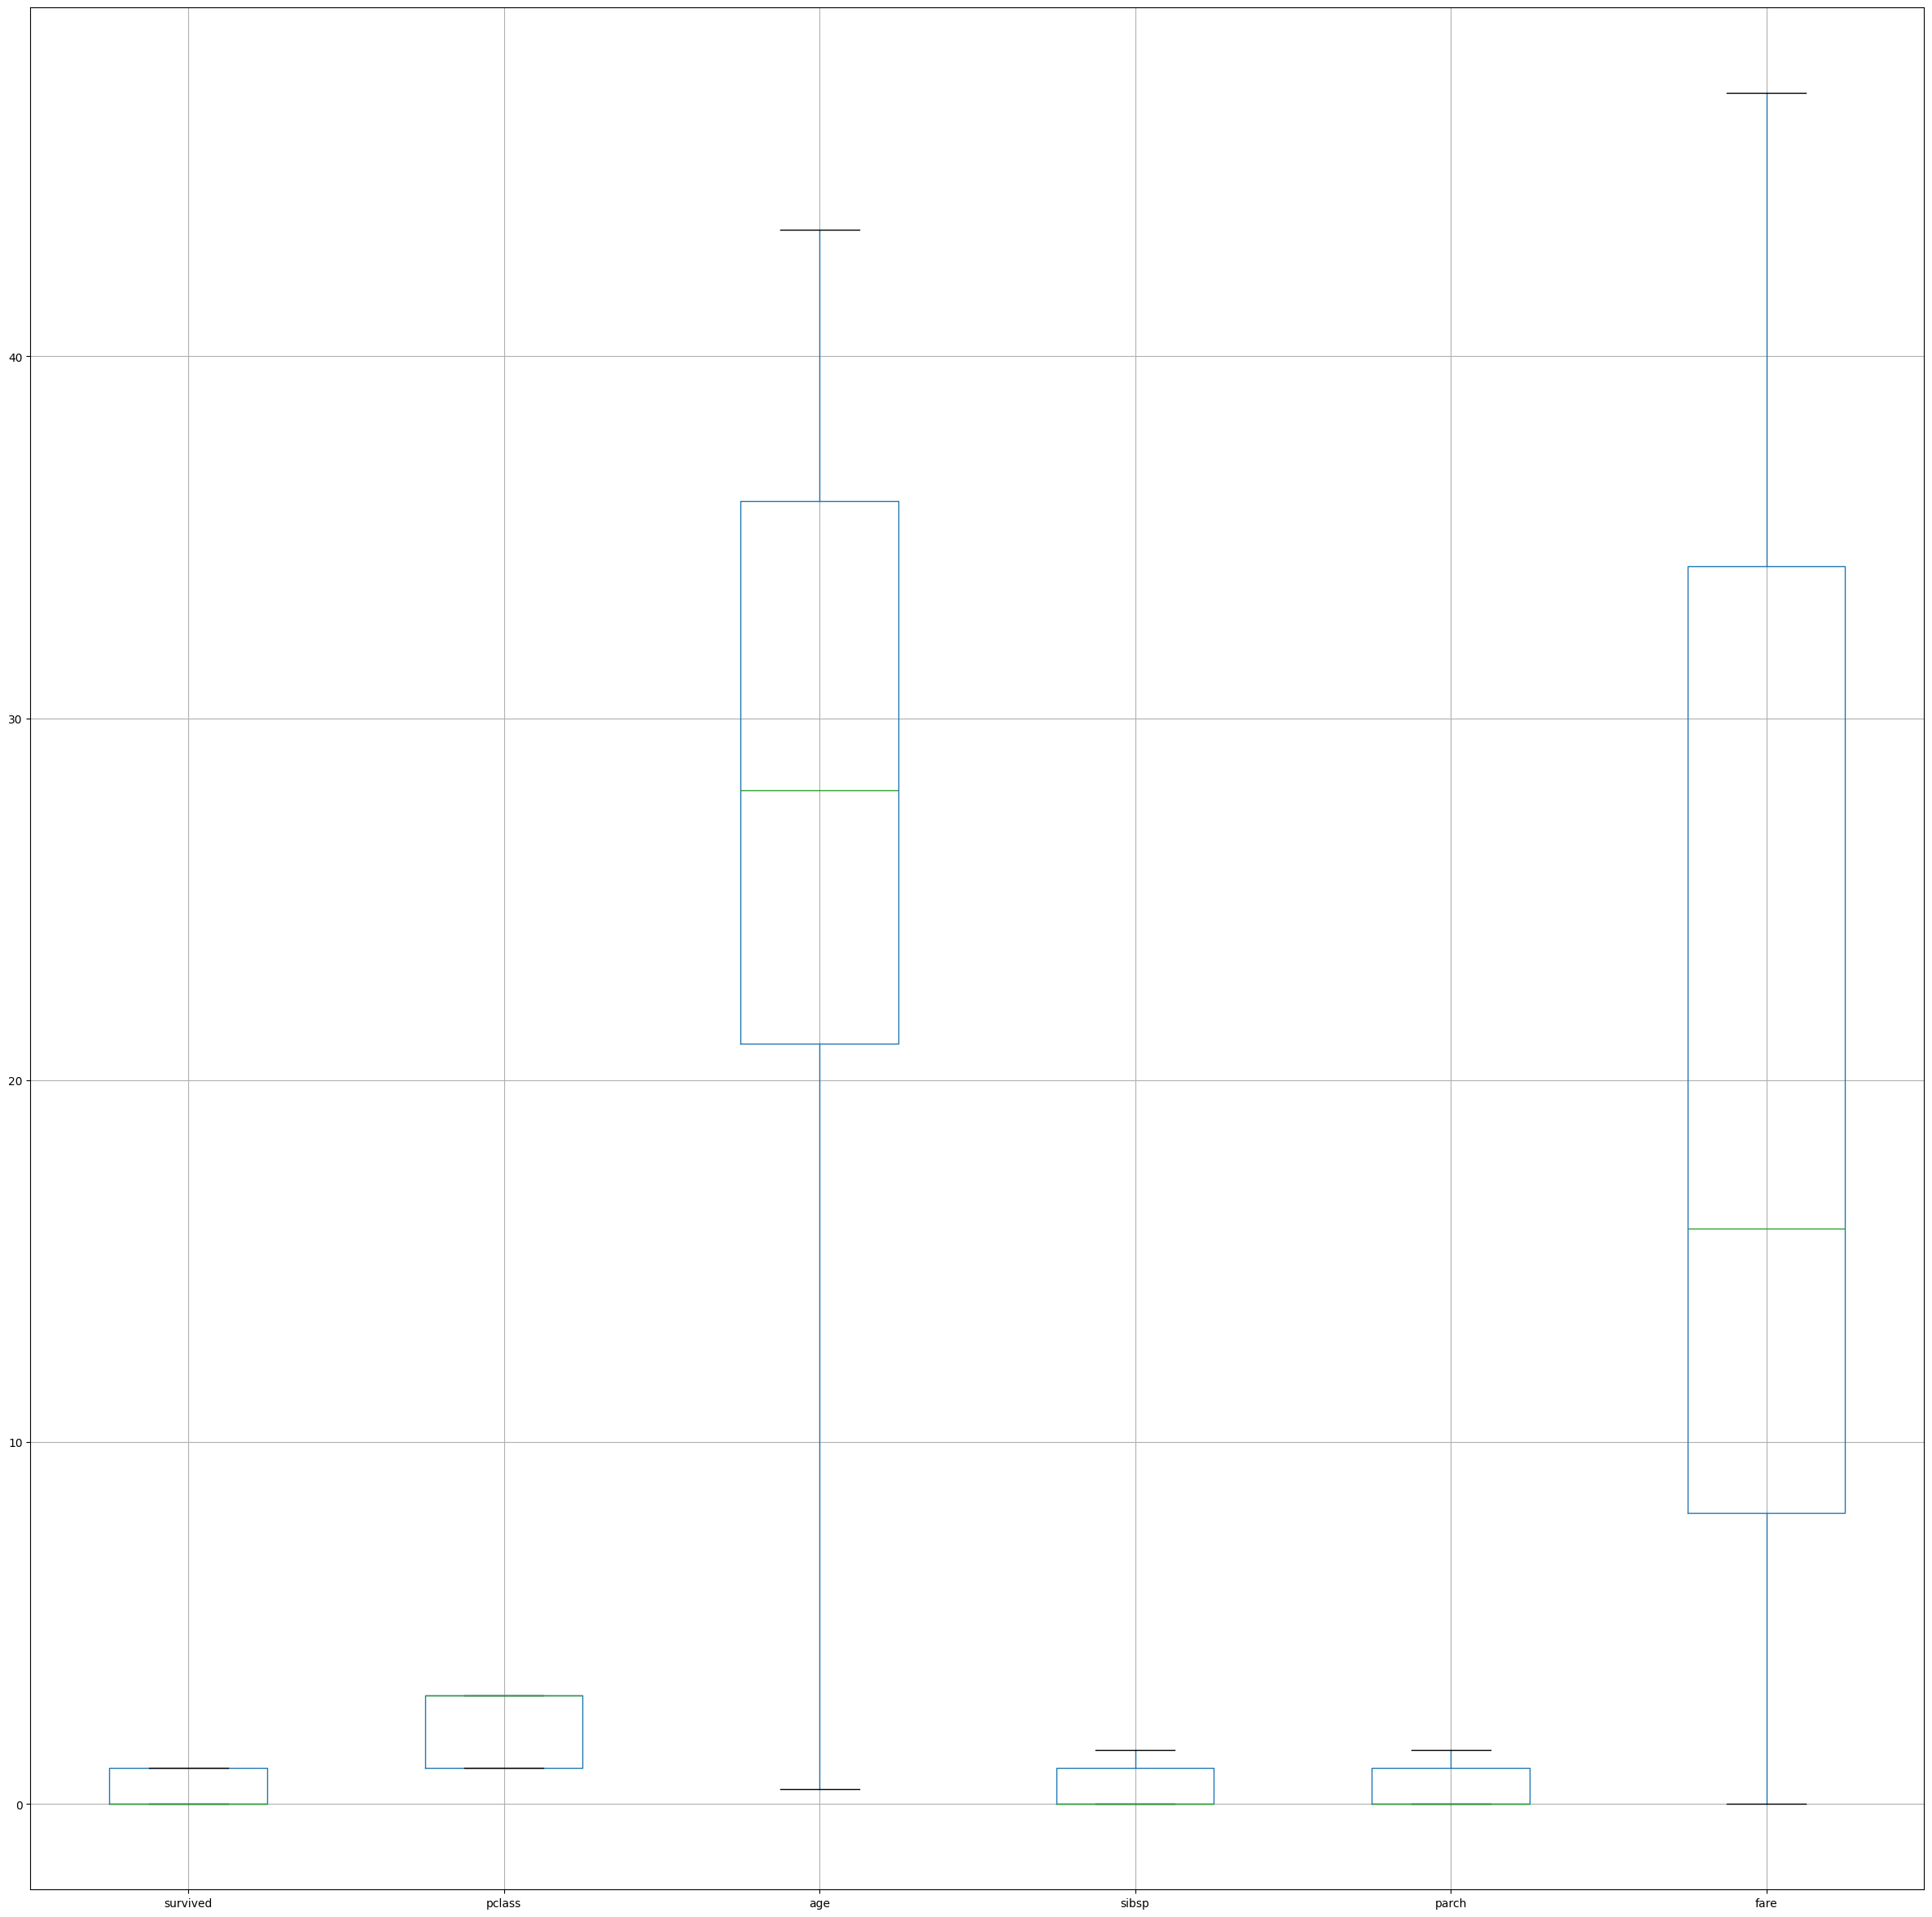

In [ ]:
numerical_columns.boxplot(figsize = (30,30))

In [ ]:
#what is the purpose of your data
# since this data is categorical
# encoding = process of changing categorical into numerical data

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1.0,0.0,7.25000,True,Southampton,False
1,1,1,female,38.0,1.0,0.0,47.27185,False,Cherbourg,False
2,1,3,female,26.0,0.0,0.0,7.92500,False,Southampton,True
3,1,1,female,35.0,1.0,0.0,47.27185,False,Southampton,False
4,0,3,male,35.0,0.0,0.0,8.05000,True,Southampton,True


# Encoding and One-Hot Encoding

**Encoding** is the process of converting categorical data into numerical values so that machine learning models can interpret it. This is important as most algorithms work with numerical data rather than raw categories.

## One-Hot Encoding
One-Hot Encoding is a method used to represent categorical data as binary vectors. Each category is represented by a vector with all zeros except for a 1 at the index corresponding to the category.

- **Step 1:** For each category, create a new column.
- **Step 2:** In each new column, assign a 1 if the original category matches the column’s category, and 0 otherwise.

**Example:**
For a feature "Color" with categories: ['Red', 'Green', 'Blue'], One-Hot Encoding will transform it into:
- Red → [1, 0, 0]
- Green → [0, 1, 0]
- Blue → [0, 0, 1]

**Why It's Done:**
- One-Hot Encoding prevents the model from interpreting categorical values as ordinal data (where higher values might imply more importance).
- It ensures each category is treated independently, making it suitable for many machine learning algorithms.

In [187]:
# encoding is converting categorical values to numerical

# Encoding categorical variables to numerical representations
# We use one-hot encoding to convert non-numeric data to binary columns

df = pd.get_dummies(df,columns = ['sex', 'embark_town', 'pclass', 'alone', 'adult_male'], drop_first= True, dtype = int)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 775 non-null    int64  
 1   age                      775 non-null    float64
 2   sibsp                    775 non-null    float64
 3   parch                    775 non-null    float64
 4   fare                     775 non-null    float64
 5   sex_male                 775 non-null    int64  
 6   embark_town_Queenstown   775 non-null    int64  
 7   embark_town_Southampton  775 non-null    int64  
 8   pclass_2                 775 non-null    int64  
 9   pclass_3                 775 non-null    int64  
 10  alone_True               775 non-null    int64  
 11  adult_male_True          775 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 78.7 KB


In [189]:
df.head()

,survived,age,sibsp,parch,fare,sex_male,embark_town_Queenstown,embark_town_Southampton,pclass_2,pclass_3,alone_True,adult_male_True
0,0,22.0,1.0,0.0,7.25000,1,0,1,0,1,0,1
1,1,38.0,1.0,0.0,47.27185,0,0,0,0,0,0,0
2,1,26.0,0.0,0.0,7.92500,0,0,1,0,1,1,0
3,1,35.0,1.0,0.0,47.27185,0,0,1,0,0,0,0
4,0,35.0,0.0,0.0,8.05000,1,0,1,0,1,1,1


# Standardization of Data

**Standardization** is the process of rescaling numerical features to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model and helps improve the performance of many machine learning algorithms.

## Why is Standardization Important?
- Many machine learning algorithms, like k-NN, SVM, and logistic regression, assume that all features are on a similar scale. Without standardization, features with larger scales can dominate the learning process.
- Standardization makes the optimization process faster and more stable, as algorithms converge more quickly when features are on the same scale.
- It helps to avoid bias in models due to features with different units or scales (e.g., income vs. age).

In [190]:
from sklearn.preprocessing import StandardScaler

# Standardizing numerical features to bring them to the same scale
scaler = StandardScaler()

In [192]:
scaling_columns = ['age', 'fare']

#scaling helps to bring the different features into same scaling
# scaling techiniques are normalization, standardization
# here we are usong standardScaler
# mean = 0, standard deviation = 1

In [194]:
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])


In [196]:
# Check the actual column names in the DataFrame
print(df.columns)

# Separate features (X) and target (y) for model training
# the target column is named 'survived'
x = df.drop(columns = "survived")
y = df["survived"]


Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton', 'pclass_2',
       'pclass_3', 'alone_True', 'adult_male_True'],
      dtype='object')


## Train-Test Split for Model Evaluation
After completing data preprocessing, the next step is to split the dataset into training and testing sets. This separation allows us to train the model on one subset of data (training set) and evaluate it on a different subset (testing set). By doing so, we can ensure that the model is generalizing well and not overfitting to the training data.

## Why Split the Data?
Training Set: Used to train the model by allowing it to learn patterns and relationships in the data.
Testing Set: Held back from the training process, the testing set is used to evaluate the model’s performance on unseen data. This provides an indication of how well the model might perform on real-world data.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Setting test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
